# MAC0417 - Visão e Processamento de Imagens: EP 1
### Veronica Stocco
#### n.USP 6828626


In [139]:
import sklearn
import os
from skimage import data, io
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [140]:
# Devolve o path para o arquivo de uma imagem baseado em seu photo_id
def get_file(f, obj_class = None):
    obj_class = data.loc[f, "obj_class"]
    file_name = data.loc[f, "file_name"]
    return ("classes/" + obj_class + "/" + file_name)

# Devolve photo_id da imagem
def get_image(obj_id, bg, loc, light):
    return data[(data["obj_id"] == obj_id) & (data["background"] == bg) & 
                (data["location"] == loc) & (data["light"] == light)]["photo_id"].sample(n = 1).values[0]

# Devolve uma combinação aleatória de fundo, local e luz 
def random_bll():
    return (random.choice(["w", "g", "b"]), random.choice(["i", "o"]), random.choice(["d", "n"]))

In [141]:
# Plota imagens com base em seu obj_id
def plot_images(obj_id, bg = None, loc = None, light = None):
    if (bg == None):
        bg, loc, light = random_bll()
        
    fig=plt.figure(figsize=(10, 10))
    columns = 4
    rows = math.ceil(columns / (len(obj_id)))
    i = 1
    
    fig.suptitle(classe + " (" + bg + ", " +loc + ", " + light + ")", fontsize=16)
    for obj in obj_id:
        img = get_file(get_image(obj, bg, loc, light))
        fig.add_subplot(5, 4, i)
        img = plt.imread(img)
        plt.imshow(img)
        i+=1
    plt.subplots_adjust(hspace=0.2)
    
    plt.tight_layout()
    plt.show()    
    
    
# Plota imagens com base em seu photo_id
def plot_images2(photo_id, classe, title, size = 10):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(size, size))

    columns = 4
    rows = math.ceil(columns / (len(photo_id)))
    i = 1
    fig.suptitle(title, fontsize=16)
    
    for photo in photo_id:
        img = "classes/" + classe + "/" + photo
        fig.add_subplot(4, 3, i)
        img = plt.imread(img)
        plt.imshow(img)
        i+=1
        
    for ax in axes[:,0]:
        ax.set_axis_off()
        
    for ax in axes[:,1]:
        ax.set_axis_off()
        
    for ax in axes[:,2]:
        ax.set_axis_off()
    
    plt.subplots_adjust(hspace=0.2)
    plt.tight_layout()
    plt.show()   
    

In [142]:
data = pd.read_csv('metadata.csv', header=0)

##  Tabela Global Sumária

**Atributos**: photo_id, obj_id, obj_class, file_name, background, location, light, bll (conforme detalhado abaixo)

**Número de classes:** 10

**Número de imagens:** 1980

**Tamanho da base:** 515.8 MB

**Resolução das imagens:** 907 linhas por 1210 colunas, havendo algumas alterações (algumas imagens foram recortadas para retirar sombras)


### Detalhamento dos Atributos

**photo_id**: int de 0 a 1, ID único da foto

**obj_id**: no formato classe_n, ID único do objeto

**obj_class**: classe do item

**file_name**: nome do arquivo

**background**: fundo da foto\
&nbsp;&nbsp;&nbsp;&nbsp;**w:** white (folha sulfite branca)\
&nbsp;&nbsp;&nbsp;&nbsp;**g:** gray (piso frio da casa)\
&nbsp;&nbsp;&nbsp;&nbsp;**b:** black (camiseta preta)
    
**location:** local onde a foto foi tirada\
&nbsp;&nbsp;&nbsp;&nbsp;**i:** inside (cozinha)\
&nbsp;&nbsp;&nbsp;&nbsp;**o:** outside (varanda)
    
**light:** hora do dia que a foto foi dirada\
&nbsp;&nbsp;&nbsp;&nbsp;**d:** day (15h)\
&nbsp;&nbsp;&nbsp;&nbsp;**n:** night (19h+)

**bll**: background, location & light. String que concatena os 3 valores anteriores.

## 

In [172]:
include =['object', 'int'] 

desc = data.describe(include = include)[:2]
del desc['bll']
desc

,photo_id,obj_id,obj_class,file_name,background,location,light
count,1980.0,1980,1980,1980,1980,1980,1980
unique,NaN,55,10,1980,3,2,2


In [173]:
data.obj_class.unique()
d = data.groupby(['obj_class']).nunique('obj_id')
del d['photo_id']
del d['bll']
del d['background']
del d['location']
del d['light']
fundo = "branco, cinza, preto"
luz = "(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora)"
d["variações de fundo"] = [fundo, fundo, fundo, fundo, fundo, fundo, fundo, fundo, fundo, fundo]
d["variações de iluminação"] = [luz, luz, luz, luz, luz, luz, luz, luz, luz, luz]
d["número de repetições"] = ["3", "3", "3", "3", "3", "3", "3", "3", "3", "3"]
d.rename(columns={"obj_id": "objetos", "file_name": "total de amostras"})



,objetos,total de amostras,variações de fundo,variações de iluminação,número de repetições
obj_class,,,,,
batom,6,216,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3
batom_liquido,5,180,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3
blush,4,144,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3
caneta,5,180,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3
esmalte,7,252,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3
iluminador,4,144,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3
lapis,6,216,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3
paleta,5,180,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3
pincel_olho,7,252,"branco, cinza, preto",(dia / noite) x ⠀⠀⠀⠀⠀(dentro / fora),3


## Imagem 1
Ilustração de todos os itens presentes no dataset. Um background / location / light aleatório foi selecionado para cada classe.

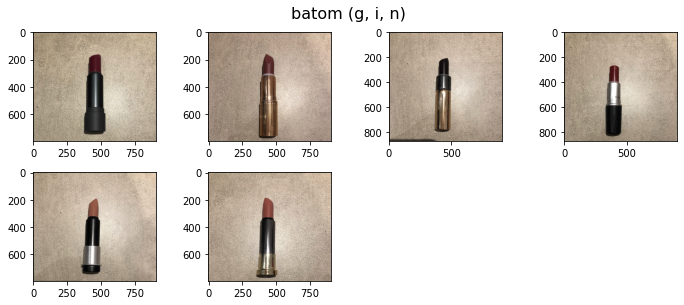

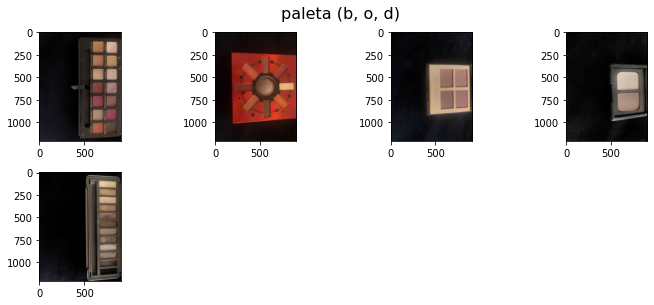

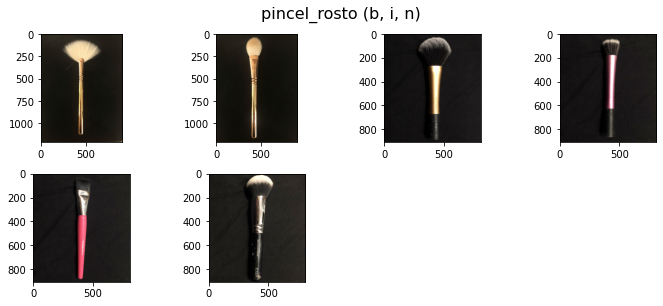

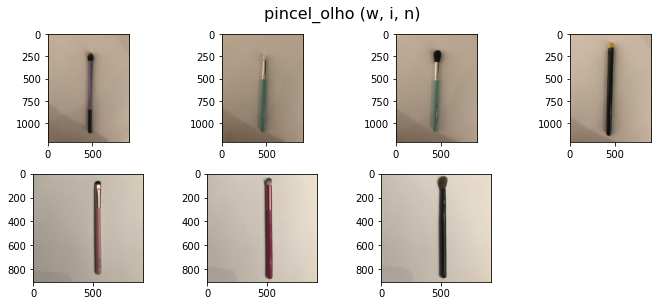

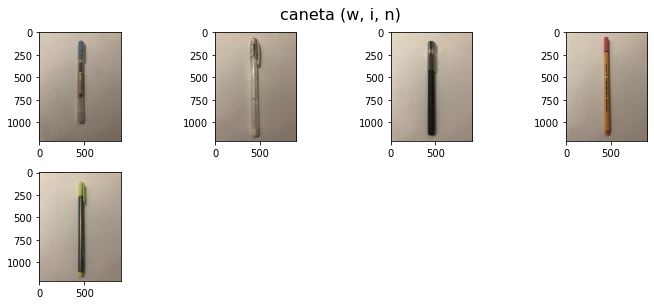

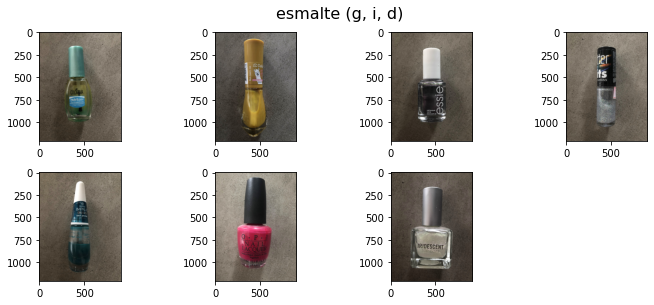

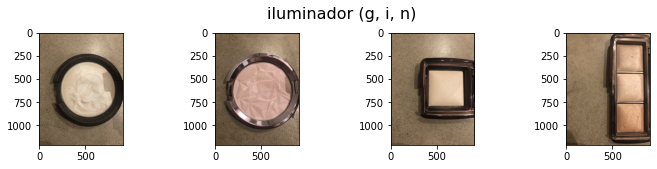

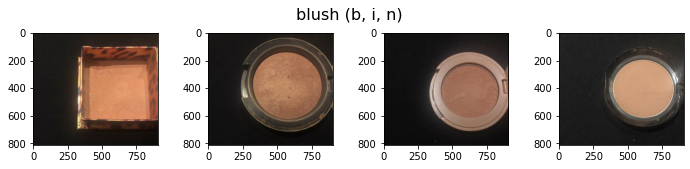

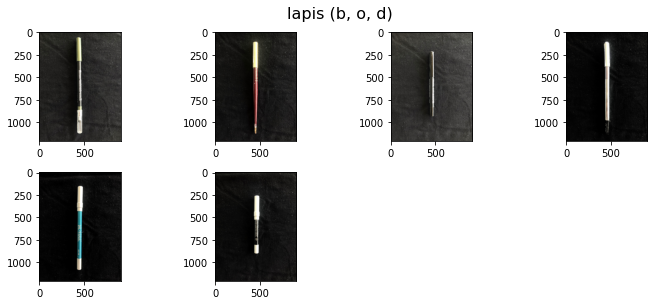

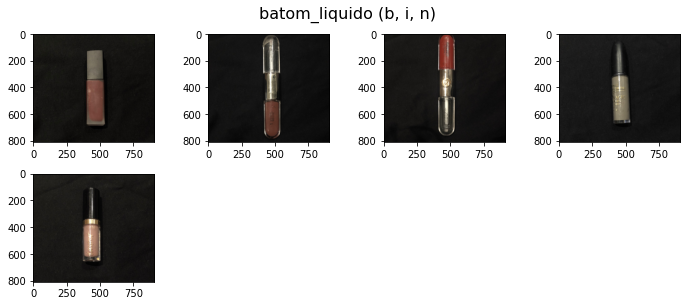

In [146]:
for classe in data.obj_class.unique():
    c = data[data["obj_class"] == classe]
    obj_id = c.obj_id.unique()
    plot_images(obj_id)

## Imagem 2
Com a comparação abaixo, fica fácil visualizar o impacto que a iluminação, horário do dia e fundo da foto fazem na imagem do pincel. 

As duas primeiras linhas são fotos tiradas de dia. As duas últimas, à noite. As linhas 1 e 3 foram tiradas dentro de casa. As 2 e 4, fora. 

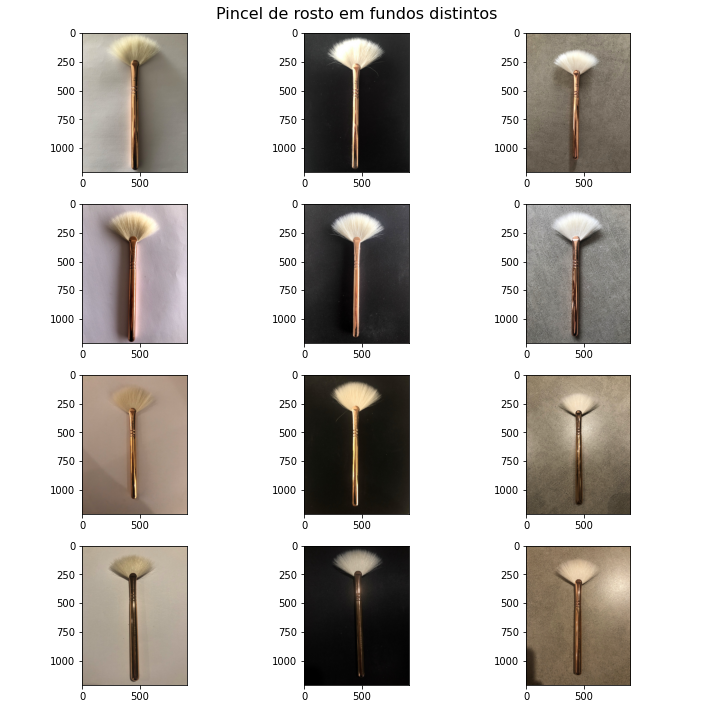

In [147]:
pincel0 = data.loc[data['obj_id']=='pincel_rosto_0']

pincel0 = pincel0.iloc[::3, :] 

plot_images2(pincel0["file_name"], "pincel_rosto", "Pincel de rosto em fundos distintos")

## Imagem 3
Todas as fotos foram tiradas em triplicata. Um exemplo de triplicata está representado na imagem abaixo.

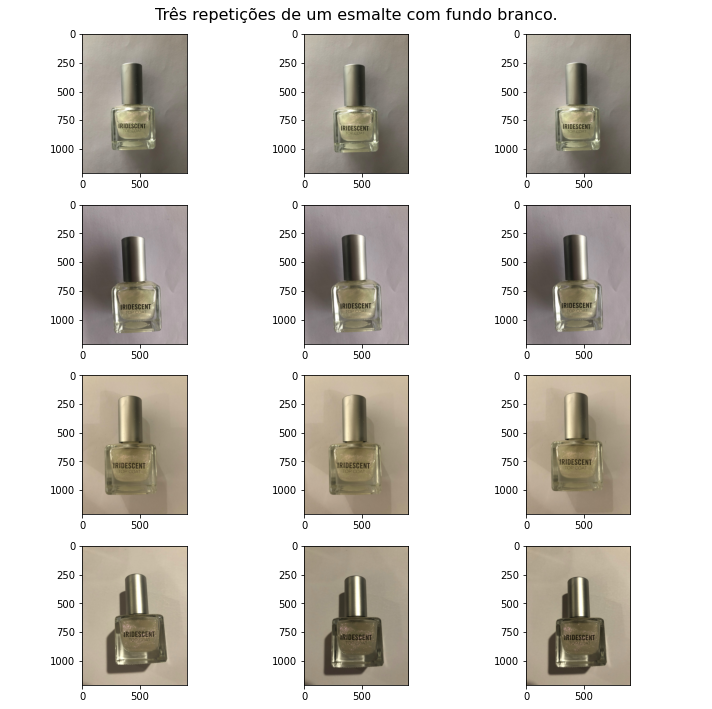

In [148]:
esmalte6 = data.loc[data['obj_id']=='esmalte_6']

esmalte6 = esmalte6.loc[esmalte6['background'] == "w"]

plot_images2(esmalte6["file_name"], "esmalte", "Três repetições de um esmalte com fundo branco.")
